# Import Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

# Load Dataset

Sumber dataset: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/metadata

In [2]:
url = 'dataset/data.csv'
data = pd.read_csv(url)
data =  pd.DataFrame(data)
print("data terdiri dari {} baris dan {} kolom".format(data.shape[0], data.shape[1]))

data terdiri dari 1000000 baris dan 8 kolom


In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# EDA


## Data Description

Penjelasan Fitur:
- distance_from_home : jarak dari rumah ke tempat dimana transaksi dilakukan
- distance_from_last_transaction : jarak dari tempat terakhir dilakukannya transaksi
- ratio_to_median_purchase_price : rasio transaksi dengan median harga beli
- repeat_retailer : apakah transaksi terjadi dari retail yang sama
- used_chip : apakah transaksi melalui chip (credit card)
- used_pin_number : apakah transaksi tersebut menggunakan nomor pin
- online_order : apakah transaksi tersebut merupakan pesanan online
- fraud : apakah transaksi tersebut termasuk penipuan (fraud)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Handle Noise Data

### Missing Values

Mengecek duplikasi data

In [6]:
if data.duplicated().sum() > 0:
  print('Terdapat redundansi')
else:
  print('Tidak terdapat redundansi')

Tidak terdapat redundansi


Mengecek apakah ada nilai null

In [7]:
print('Jumlah missing value adalah :', data.isnull().sum().sum())

Jumlah missing value adalah : 0


Mengecek apakah ada nilai yang tidak sesuai pada data boolean

In [8]:
boolean_features = ["repeat_retailer", "used_chip", "used_pin_number", "online_order", "fraud"]

In [9]:
for feature in boolean_features:
  print("unique values from: {}".format(feature))
  print(data[feature].unique())

unique values from: repeat_retailer
[1. 0.]
unique values from: used_chip
[1. 0.]
unique values from: used_pin_number
[0. 1.]
unique values from: online_order
[0. 1.]
unique values from: fraud
[0. 1.]


## Univariate

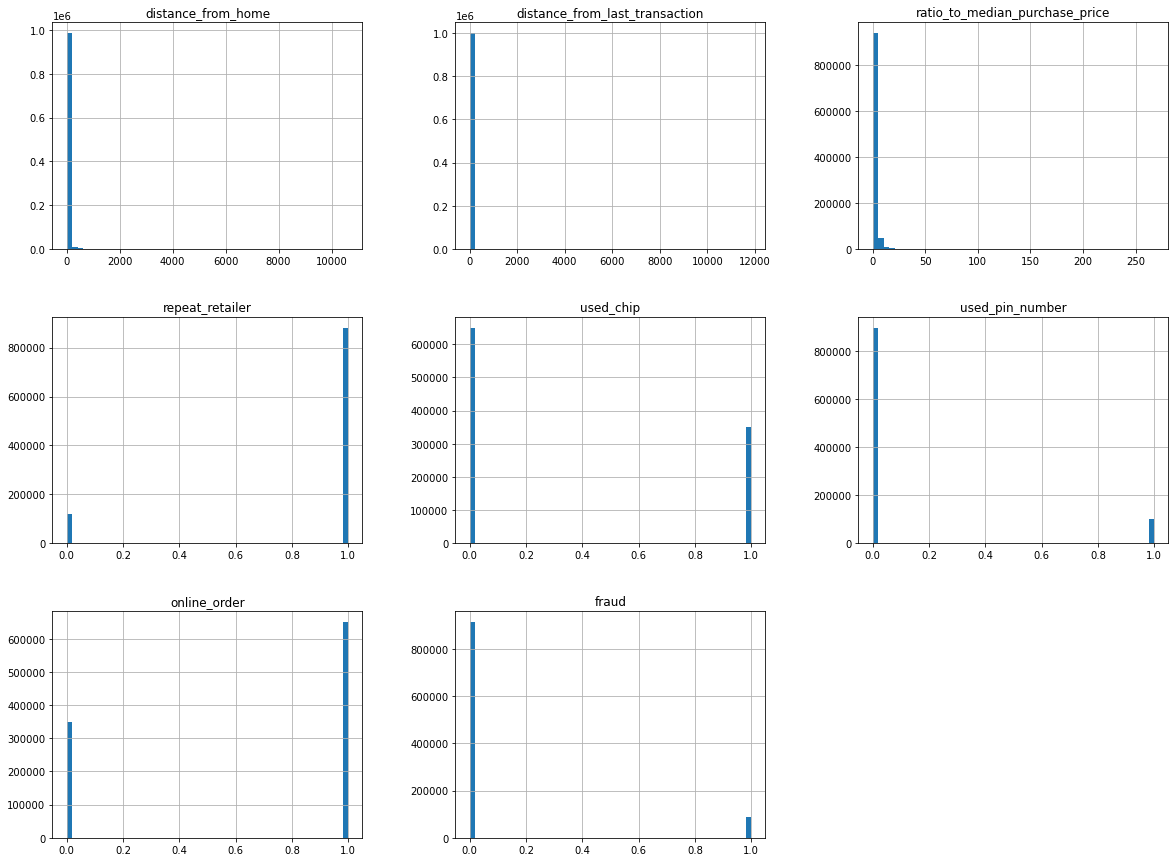

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
fraud_0 = (data['fraud'] == 0).sum()
fraud_1 = (data['fraud'] == 1).sum()
print("jumlah fitur fraud bernilai 0 adalah {} dengan persentase {}%".format(fraud_0, (fraud_0/data.shape[0])*100))
print("jumlah fitur fraud bernilai 1 adalah {} dengan persentase {}%".format(fraud_1, (fraud_1/data.shape[0])*100))

jumlah fitur fraud bernilai 0 adalah 912597 dengan persentase 91.2597%
jumlah fitur fraud bernilai 1 adalah 87403 dengan persentase 8.7403%


Dari histogram diatas, kita bisa memahami beberapa informasi, antara lain:
- distribusi data numerikal kontinyu (distance_from_home, distance_from_last_transaction dan ratio_to_median_purchase_price) miring ke kanan atau right-skewed. Hal ini akan berimplikasi pada model sehingga lebih baik dilakukan standarisasi nantinya.
- distribusi data fraud tidak seimbang (imbalance data) sehingga ada baiknya dilakukan undersampling.


## Undersampling

Disini saya akan melakukan undersampling. Saya akan melakukan "Random Under Sampling" dengan menghilangkan data sehingga distribusi datanya bisa lebih seimbang.

### Splitting the data for undersampling

Sebelum melakukan undersampling, saya memisahkan dengan dataframe aslinya terlebih dahulu. Hal ini dilakukan karena nantinya pada saat evaluasi model (evaluation), saya akan menguji model dengan dataframe aslinya bukan dataframe yang dibuat dengan teknik undersampling. Tujuannya untuk menyesuaikan model dengan dataframe sebelum dilakukan undersample atau oversample dan dapat mendeteksi pola lebih baik.

In [12]:
X = data.drop('fraud', axis=1)
y = data['fraud']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

### Random Under Sampling

In [14]:
df = data.sample(frac=1)

In [15]:
fraud_df = df.loc[df['fraud'] == 1]
non_fraud_df = df.loc[df['fraud'] == 0][:fraud_1]

In [16]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

In [17]:
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
667539,44.697541,7.903891,4.976819,1.0,0.0,0.0,1.0,1.0
722480,113.930884,0.145017,0.219482,1.0,0.0,0.0,1.0,1.0
32179,2.206906,20.288222,0.872481,1.0,1.0,0.0,1.0,0.0
112635,10.167144,28.425966,0.134878,1.0,1.0,0.0,0.0,0.0
948360,6.496224,0.820273,1.698770,1.0,0.0,0.0,1.0,0.0


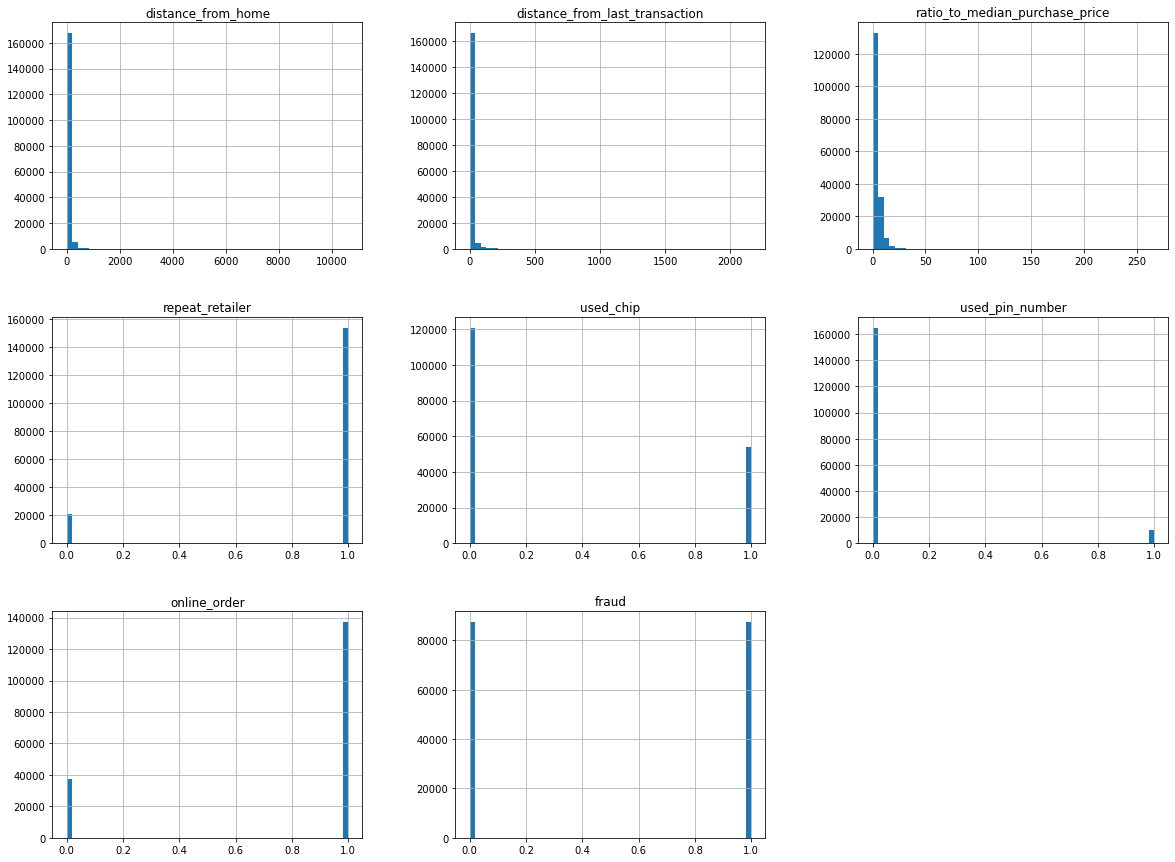

In [18]:
new_df.hist(bins=50, figsize=(20,15))
plt.show()

Ketika distribusi data fraud sudah seimbang, barulah saya melakukan pembersihan data lebih lanjut dengan menghilangkan outlier.

## Handle Outlier

In [19]:
data_numeric = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]

<AxesSubplot:xlabel='distance_from_last_transaction'>

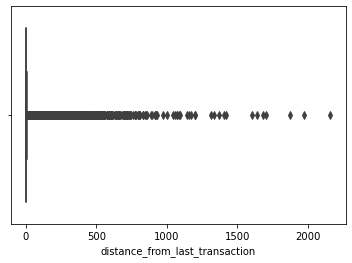

In [20]:
sns.boxplot(x = new_df["distance_from_last_transaction"])

<AxesSubplot:xlabel='distance_from_home'>

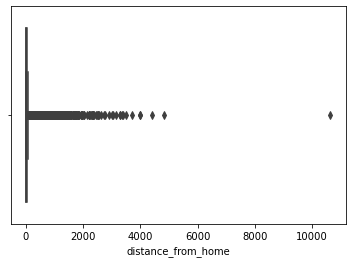

In [21]:
sns.boxplot(x = new_df["distance_from_home"])

<AxesSubplot:xlabel='ratio_to_median_purchase_price'>

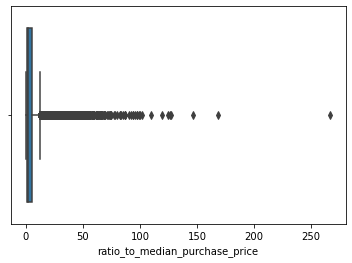

In [22]:
sns.boxplot(x = new_df["ratio_to_median_purchase_price"])

Dari boxplot diatas, dapat diperoleh informasi bahwa terdapat beberapa nilai yang terlalu jauh dari distribusi nilai normalnya. Untuk itu, saya hanya menghilangkan nilai-nilai terakhir (dari quantile terakhir) sehingga distribusi nilainya dapat menjadi lebih baik dan tidak menghilangkan terlalu banyak data. Saya akan menggunakan batas bawah mulai quantile=0 dan batas atas pada quantile=0.99.

In [23]:
Q1 = new_df.quantile(0)
Q3 = new_df.quantile(0.99)
IQR=Q3-Q1
new_df=new_df[~((new_df<(Q1-1.5*IQR))|(new_df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
new_df.shape

(174142, 8)

## Multivariate

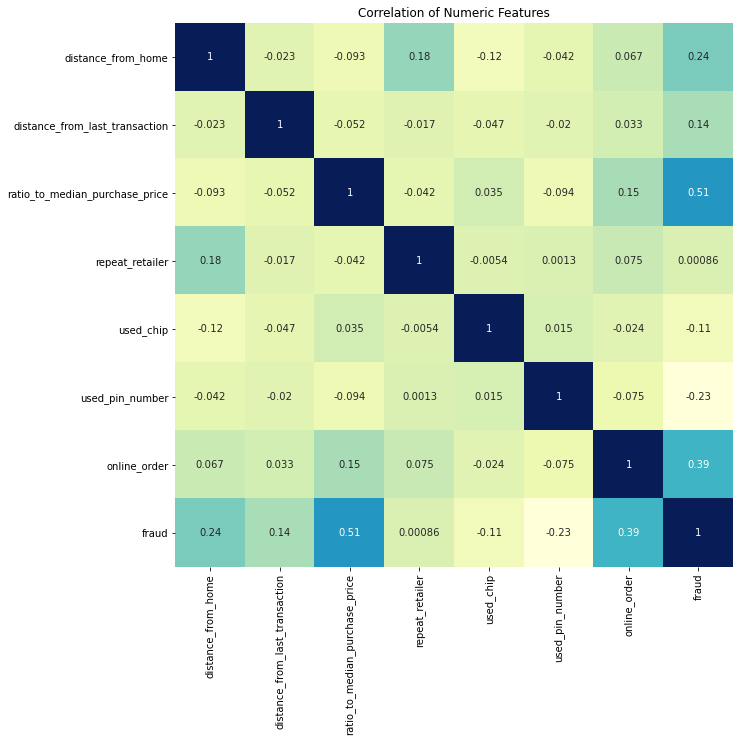

In [24]:
plt.figure(figsize=(10, 10))

sns.heatmap(new_df.select_dtypes(np.number).corr(), 
            annot=True,
            cbar=False,
            cmap="YlGnBu",
            xticklabels=new_df.select_dtypes(np.number).columns,
            yticklabels=new_df.select_dtypes(np.number).columns)
plt.title('Correlation of Numeric Features')
plt.show()

Jika diamati, fitur repeat_retailer memiliki korelasi sangat rendah dengan fitur target yaitu fraud. Sehingga, fitur tersebut dapat di-drop.

In [25]:
new_df.drop(['repeat_retailer'], inplace=True, axis=1)
new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
667539,44.697541,7.903891,4.976819,0.0,0.0,1.0,1.0
722480,113.930884,0.145017,0.219482,0.0,0.0,1.0,1.0
32179,2.206906,20.288222,0.872481,1.0,0.0,1.0,0.0
112635,10.167144,28.425966,0.134878,1.0,0.0,0.0,0.0
948360,6.496224,0.820273,1.698770,0.0,0.0,1.0,0.0


# Data Preparation

## Train Test Split

In [26]:
new_X = new_df.drop('fraud', axis=1)
new_y = new_df['fraud']

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [27]:
x_test.drop(['repeat_retailer'], inplace=True, axis=1)

In [28]:
print(f'Total sample in train dataset: {len(new_x_train)}')
print(f'Total sample in test dataset: {len(new_x_test)}')
print(f'Total sample in test original dataset: {len(x_test)}')

Total sample in train dataset: 139313
Total sample in test dataset: 34829
Total sample in test original dataset: 200000


## Stardardization

In [29]:
scaler = MinMaxScaler()
scaler.fit(new_x_train)
new_x_train = scaler.transform(new_x_train)
x_test = scaler.transform(x_test)

# Modeling

Disini saya akan melakukan perbandingan antara dua algoritma, yaitu:
- Naive Bayes
- Logistic Regression

## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(new_x_train, new_y_train)
model_bayes = bayes.predict(x_test)

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
 
lr = LogisticRegression()
lr.fit(new_x_train, new_y_train)
model_lr = lr.predict(x_test)

# Evaluation

In [32]:
def evaluate_classifier_performance(classifier, prediction, y_test = y_test, x_test = x_test):
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(x_test))))

    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93    182557
         1.0       0.42      0.97      0.59     17443

    accuracy                           0.88    200000
   macro avg       0.71      0.92      0.76    200000
weighted avg       0.95      0.88      0.90    200000


Accuracy: 0.880375
Precision Macro Average: 0.707928210635757
Precision Micro Average: 0.880375
Recall Macro Average: 0.9196688187065132
Recall Micro Average: 0.880375
F1 Macro Average: 0.757621946880048
F1 Micro Average: 0.880375


Confusion Matrix



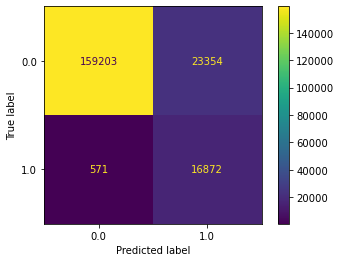

In [33]:
evaluate_classifier_performance(bayes, model_bayes)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.57      0.96      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000


Accuracy: 0.93378
Precision Macro Average: 0.7837597488678416
Precision Micro Average: 0.93378
Recall Macro Average: 0.9436078813011801
Recall Micro Average: 0.93378
F1 Macro Average: 0.8390930692100154
F1 Micro Average: 0.93378


Confusion Matrix



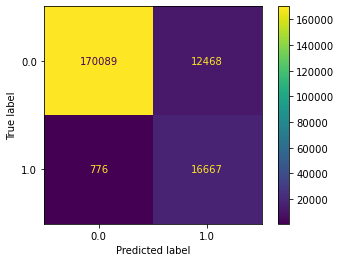

In [34]:
evaluate_classifier_performance(lr, model_lr)